# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, SELU DO0.5

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Options

In [20]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSelu'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'do':0}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [21]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 2.805s 


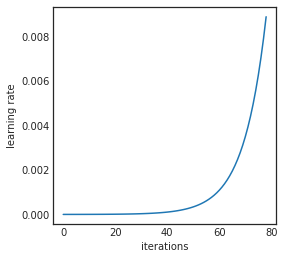

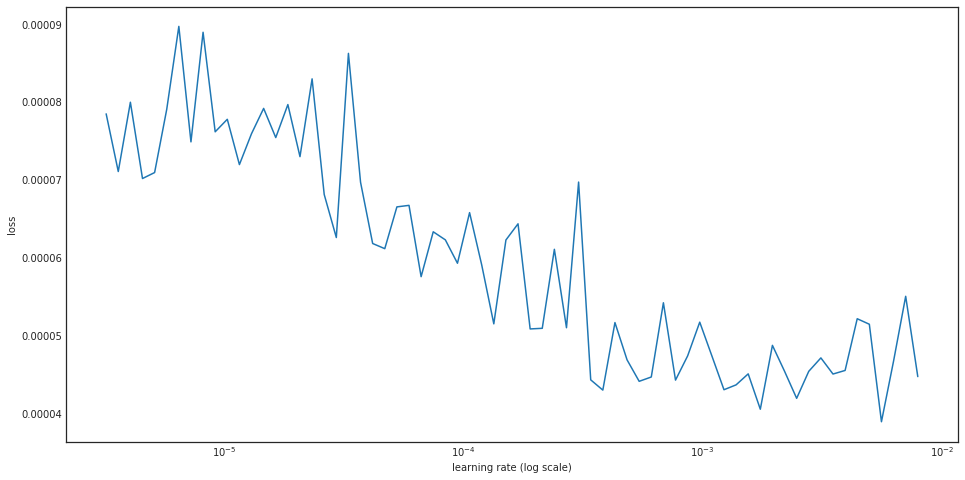

______________________________________



In [23]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-6,1e-2], trainOnWeights=True, verbose=0)

In [24]:
compileArgs['lr'] = 1e-4

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.61454179051e-05
2 New best found: 4.32877807051e-05
3 New best found: 4.28878270268e-05
4 New best found: 4.1491495671e-05
5 New best found: 4.0717102545e-05
6 New best found: 4.0340635074e-05
7 New best found: 4.02823982052e-05
8 New best found: 3.97930918942e-05
9 New best found: 3.8824486443e-05
10 New best found: 3.83056475941e-05
11 New best found: 3.78624163929e-05
12 New best found: 3.76242069165e-05
13 New best found: 3.74075437173e-05
14 New best found: 3.73389279968e-05
15 New best found: 3.73245324519e-05
16 New best found: 3.71254948266e-05
17 New best found: 3.64364091744e-05
18 New best found: 3.59311987677e-05
19 New best found: 3.57938441526e-05
20 New best found: 3.53686630951e-05
21 New best found: 3.51706842188e-05
22 New best found: 3.50939279185e-05
23 New best found: 3.48976767643e-05
24 New best found: 3.472402894e-05
25 New best found: 3

6 New best found: 4.00265787382e-05
7 New best found: 3.99505612865e-05
8 New best found: 3.90767909938e-05
9 New best found: 3.84047758597e-05
10 New best found: 3.77100132832e-05
11 New best found: 3.73123822655e-05
12 New best found: 3.70159027334e-05
13 New best found: 3.69679406696e-05
14 New best found: 3.69115350198e-05
15 New best found: 3.69045404458e-05
16 New best found: 3.64369164528e-05
17 New best found: 3.59746507611e-05
18 New best found: 3.56709624383e-05
20 New best found: 3.55445313552e-05
21 New best found: 3.52365779024e-05
22 New best found: 3.51689917256e-05
23 New best found: 3.51246047089e-05
24 New best found: 3.48792197445e-05
26 New best found: 3.47729738679e-05
27 New best found: 3.47072375128e-05
29 New best found: 3.46990111607e-05
30 New best found: 3.46957784322e-05
34 New best found: 3.46201567802e-05
36 New best found: 3.44364155574e-05
39 New best found: 3.4274227953e-05
42 New best found: 3.42728407714e-05
44 New best found: 3.41385754898e-05
47 New

20 New best found: 3.54794468316e-05
22 New best found: 3.52543346729e-05
23 New best found: 3.51777569827e-05
24 New best found: 3.50542947126e-05
25 New best found: 3.50439395756e-05
26 New best found: 3.49765368766e-05
27 New best found: 3.49375586651e-05
28 New best found: 3.49212286033e-05
29 New best found: 3.48859343707e-05
30 New best found: 3.48760162597e-05
34 New best found: 3.47499698895e-05
35 New best found: 3.47133336516e-05
36 New best found: 3.46157955442e-05
38 New best found: 3.43498401911e-05
39 New best found: 3.42780670719e-05
42 New best found: 3.41329752904e-05
45 New best found: 3.40495500495e-05
46 New best found: 3.39990425913e-05
49 New best found: 3.3934836468e-05
50 New best found: 3.39328036323e-05
51 New best found: 3.39134376074e-05
53 New best found: 3.38707428775e-05
54 New best found: 3.38640410468e-05
56 New best found: 3.38330025901e-05
57 New best found: 3.38125324735e-05
60 New best found: 3.38051437793e-05
69 New best found: 3.36841063574e-05
72

42 New best found: 3.51839286668e-05
44 New best found: 3.51361759036e-05
45 New best found: 3.50100888099e-05
48 New best found: 3.49746132255e-05
50 New best found: 3.49332352183e-05
51 New best found: 3.48624194128e-05
53 New best found: 3.48104265999e-05
57 New best found: 3.47990586131e-05
59 New best found: 3.47989704271e-05
60 New best found: 3.47853097948e-05
62 New best found: 3.47821638716e-05
63 New best found: 3.47819145842e-05
68 New best found: 3.47281276598e-05
71 New best found: 3.46217178783e-05
73 New best found: 3.45140941397e-05
75 New best found: 3.44087662583e-05
80 New best found: 3.44026685183e-05
81 New best found: 3.4372914175e-05
82 New best found: 3.43329468495e-05
83 New best found: 3.43227409816e-05
86 New best found: 3.42615660804e-05
88 New best found: 3.42109162404e-05
90 New best found: 3.41829559155e-05
92 New best found: 3.41192511012e-05
96 New best found: 3.40772589945e-05
100 New best found: 3.40694470069e-05
102 New best found: 3.40324396951e-05


42 New best found: 3.40271108612e-05
43 New best found: 3.39315932e-05
45 New best found: 3.39169331716e-05
46 New best found: 3.37868018834e-05
51 New best found: 3.36889462611e-05
56 New best found: 3.36736502898e-05
57 New best found: 3.36527254525e-05
60 New best found: 3.36498686823e-05
61 New best found: 3.36424496437e-05
62 New best found: 3.36414524167e-05
63 New best found: 3.36414330759e-05
67 New best found: 3.36137580416e-05
68 New best found: 3.36051934955e-05
69 New best found: 3.35566802219e-05
74 New best found: 3.34861908922e-05
75 New best found: 3.34780805747e-05
76 New best found: 3.34435876983e-05
77 New best found: 3.34261656634e-05
79 New best found: 3.33807569518e-05
81 New best found: 3.33762802457e-05
82 New best found: 3.32228361737e-05
91 New best found: 3.32046414969e-05
92 New best found: 3.31535325685e-05
96 New best found: 3.31274196082e-05
101 New best found: 3.30693278772e-05
102 New best found: 3.30586446604e-05
107 New best found: 3.30527114273e-05
1

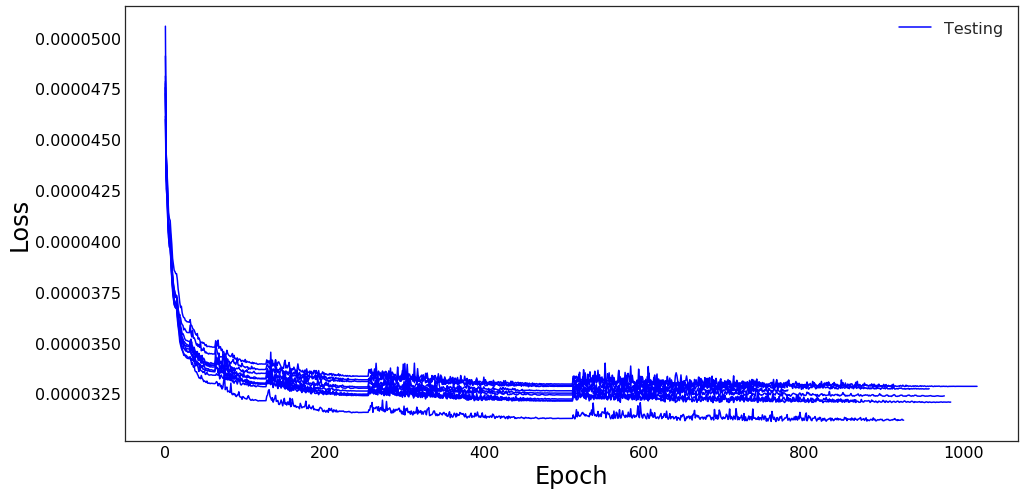

Mean wAUC = 0.0655 +- 0.0006
______________________________________



In [25]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=160, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [26]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [27]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 3 with loss = 3.11276271699e-05
Model 1 is 8 with loss = 3.20533983959e-05
Model 2 is 4 with loss = 3.20618013458e-05
Model 3 is 9 with loss = 3.22133903108e-05
Model 4 is 2 with loss = 3.23461589628e-05
Model 5 is 0 with loss = 3.25172392588e-05
Model 6 is 7 with loss = 3.25873437253e-05
Model 7 is 1 with loss = 3.27093860637e-05
Model 8 is 5 with loss = 3.27549726469e-05
Model 9 is 6 with loss = 3.28401925974e-05


## Response on development data

In [28]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000198852705375s per sample

Predicting batch 2 out of 10
Prediction took 0.00014027564098s per sample

Predicting batch 3 out of 10
Prediction took 0.000141956002633s per sample

Predicting batch 4 out of 10
Prediction took 0.000139698207378s per sample

Predicting batch 5 out of 10
Prediction took 0.000139708554745s per sample

Predicting batch 6 out of 10
Prediction took 0.000141759693623s per sample

Predicting batch 7 out of 10
Prediction took 0.00013946775198s per sample

Predicting batch 8 out of 10
Prediction took 0.000139794830585s per sample

Predicting batch 9 out of 10
Prediction took 0.000139460467572s per sample

Predicting batch 10 out of 10
Prediction took 0.000140355929082s per sample



In [29]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.903610671665, weighted 0.94139959079


## Response on val data

In [30]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000143703222275s per sample

Predicting batch 2 out of 10
Prediction took 0.000141626787186s per sample

Predicting batch 3 out of 10
Prediction took 0.000141125202179s per sample

Predicting batch 4 out of 10
Prediction took 0.000143046188354s per sample

Predicting batch 5 out of 10
Prediction took 0.000140843391418s per sample

Predicting batch 6 out of 10
Prediction took 0.000140471029282s per sample

Predicting batch 7 out of 10
Prediction took 0.000141331195831s per sample

Predicting batch 8 out of 10
Prediction took 0.000141576433182s per sample

Predicting batch 9 out of 10
Prediction took 0.000139810419083s per sample

Predicting batch 10 out of 10
Prediction took 0.000141821956635s per sample



In [31]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.899940253488, weighted 0.934323064103


## Evaluation

### Import in dataframe

In [33]:
valframe = convertToDF(valData)

50000 candidates loaded


In [34]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

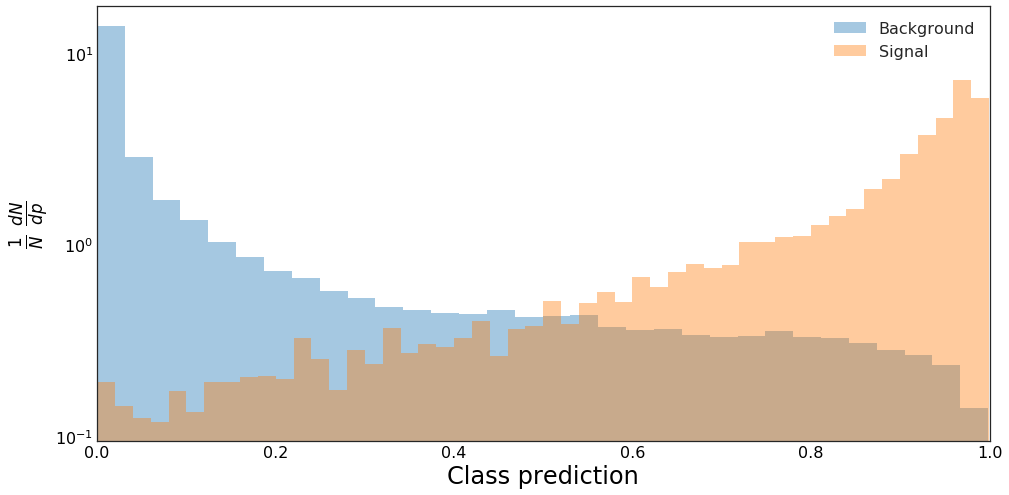

In [35]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [36]:
valframe['ams'] = amsScan(valframe)[0]

[0.92699134349822998, 1.6492084566349627]


In [37]:
bests = foldAMSScan(valframe, 10)

[0.95838600397109985, 1.8125834965493686]
Fold 0, best AMS 1.81258349655 at cut of 0.958386003971. Total weights Signal:Bkg. 13.5602645874:8062.44726562


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.9429052472114563, 1.7647344359088426]
Fold 1, best AMS 1.76473443591 at cut of 0.942905247211. Total weights Signal:Bkg. 13.5156583786:8222.34570312
[0.90134823322296143, 1.5624950943065257]
Fold 2, best AMS 1.56249509431 at cut of 0.901348233223. Total weights Signal:Bkg. 14.2797613144:8126.56591797
[0.9811173677444458, 2.2527042735457297]
Fold 3, best AMS 2.25270427355 at cut of 0.981117367744. Total weights Signal:Bkg. 13.9336538315:8347.36621094
[0.92349129915237427, 1.8094299207133324]
Fold 4, best AMS 1.80942992071 at cut of 0.923491299152. Total weights Signal:Bkg. 14.0195713043:8089.62939453
[0.98779445886611938, 1.7816925916468462]
Fold 5, best AMS 1.78169259165 at cut of 0.987794458866. Total weights Signal:Bkg. 14.1323261261:8059.59179688
[0.98793870210647583, 1.7067151419427404]
Fold 6, best AMS 1.70671514194 at cut of 0.987938702106. Total weights Signal:Bkg. 13.7522115707:8270.9375
[0.97953158617019653, 1.7199080379281768]
Fold 7, best AMS 1.71990803793 at cut of 0.979

In [38]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000143552311984s per sample

Predicting batch 2 out of 10
Prediction took 0.000140515184402s per sample

Predicting batch 3 out of 10
Prediction took 0.000140443962271s per sample

Predicting batch 4 out of 10
Prediction took 0.000145449165864s per sample

Predicting batch 5 out of 10
Prediction took 0.000146461872621s per sample

Predicting batch 6 out of 10
Prediction took 0.000140870510448s per sample

Predicting batch 7 out of 10
Prediction took 0.000140628324855s per sample

Predicting batch 8 out of 10
Prediction took 0.000140071634813s per sample

Predicting batch 9 out of 10
Prediction took 0.000140400127931s per sample

Predicting batch 10 out of 10
Prediction took 0.000140059271726s per sample



In [39]:
saveTest(0.959657006391, 'Day_6')

../Data/Day_6_test.csv


In [41]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6"

Successfully submitted to Higgs Boson Machine Learning Challenge